In [1]:
library(MASS)
fix(Boston)

The `lm()` function can also accommodate non-linear transformations of the predictors.

Given a predictor $X$, we can create a predictor $X^2$ using `I(X^2)`, the function `I()` is needed since the `^` has a special meaning in a formula. Wrapping allows raising `X` to the power 2.

In [5]:
lm.fit2=lm(medv~lstat+I(lstat^2), data=Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We can use the `anova()` function to quantify the extent to which the quadratic fit is superior to the linear fit.

In [6]:
lm.fit = lm(medv~lstat, data=Boston)
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


The null hypothesis for the ANOVA is that the two models fit the data equally well, and the alternative hypothesis is that the quadratic model is superior. 

Here the F-statistic is 135 and the associated p-value is virtually zero.

This provides clear evidence that the model containing the predictors `lstat` and `lstat^2` is far superor to the model that only contains `lstat`

This is not surprising as in section 3.6.2 we saw evidence for non-linearity in the relationship between `medv` and `lstat`.

If we plot the residuals we see that there is now little discernible pattern in the residuals

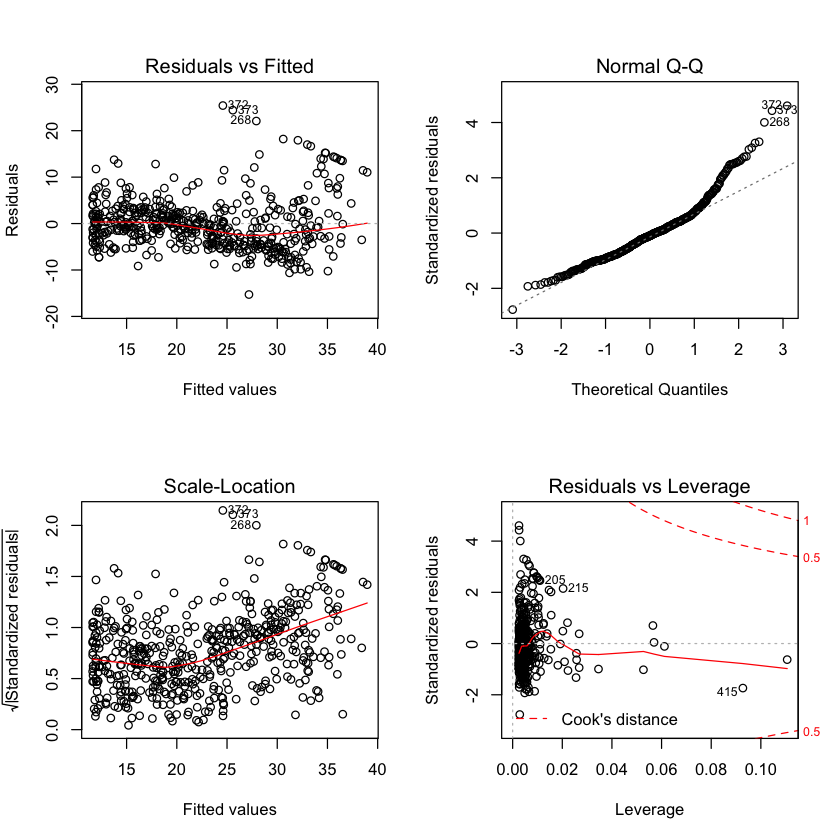

In [9]:
par(mfrow=c(2,2))
plot(lm.fit2)

In order to create a cubic fit we can include a predictor of the form `I(X^3)`. However this approach can start to get cumbersome for higher-order polynomials. A better approach involves using the `poly()` function to create polynomials within `lm()`.

For example, the following command produces a fifth-order polynomial fit:

In [12]:
lm.fit5=lm(medv~poly(lstat, 5), data=Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This suggests that including additional polynomial terms, up to fifth order leads to improvement in the model fit.

However further investigation of the data reveals that no polynomial terms beyond fifth order have significant p-values in a regression fit.

Here is an example of a log transformation:

In [13]:
summary(lm(medv~log(rm),data=Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16
